<a href="https://colab.research.google.com/github/kostis2019/basic/blob/main/Simple_NN_with__PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A First Feedforward Neural Network (FFNN)

### Feedforward Neural Networks:
A Feedforward Neural Network (FFNN) is one of the simplest types of artificial neural networks. In an FFNN, the data flows in one direction—from input to output—through fully connected layers. Each layer consists of a set of neurons, and each neuron applies a linear transformation followed by a non-linear activation function.

### Dataset:
We will use the Boston Housing dataset for our regression task. This dataset contains information about houses in Boston and their prices.

In [1]:
# PREPARE DATA

import torch
from sklearn.datasets import fetch_openml
boston = fetch_openml("boston")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = boston.data, boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [2]:
# DEFINE NEURAL NETWORK torch -> nn !!!!!!
import torch.nn as nn
criterion = nn.MSELoss()
#
class FFNN(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # y = a + bx
        self.fc2 = nn.Linear(hidden_dim, output_dim) # y = a + bx
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [3]:
# DIMENSIONS
input_dim = X_train.shape[1]
print(input_dim)
hidden_dim = 64
output_dim = 1

13


In [4]:
# THE MODEL
model = FFNN(input_dim, hidden_dim, output_dim)

In [5]:
# TRAIN MODEL
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01)
#
num_epochs = 100
loss_values = []
for epoch in range(num_epochs):

    model.train() #set model to training mode
    optimizer.zero_grad()
    outputs = model(X_train) # predictions on training set
    loss = criterion(outputs, y_train) # calculate the loss
    loss.backward() # changes in the gradient
    optimizer.step() # apply changes to the model

    loss_values.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, loss: {loss.item(): 4f}')

Epoch 10, loss:  26.115910
Epoch 20, loss:  18.473269
Epoch 30, loss:  15.467270
Epoch 40, loss:  13.774002
Epoch 50, loss:  12.693730
Epoch 60, loss:  11.951831
Epoch 70, loss:  11.387642
Epoch 80, loss:  10.941573
Epoch 90, loss:  10.585323
Epoch 100, loss:  10.303057


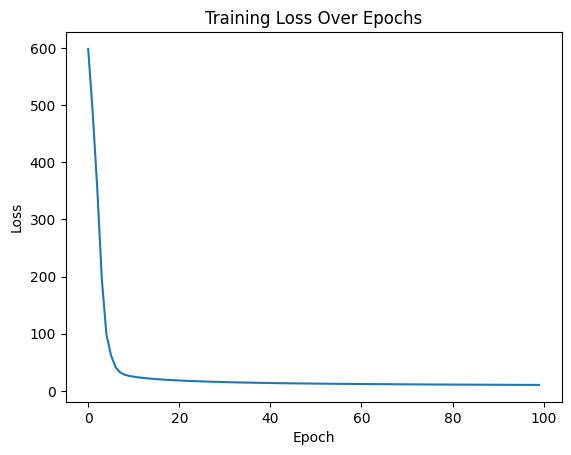

In [6]:
# PLOT LOSS
import matplotlib.pyplot as plt
#
plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()